# __TUGAS MINGGU 9__

Nama : Annisa Fitri Yuliandra

Kelas : TI 3B

NIM : 2041720123 

## __Tugas 1 : Bagging__

Pada folder data, terdapat dataset jamur yang kita gunakan pada materi Decision Tree. Berdasarkan dataset yang sama, bandingkan peforma antara algoritma DT dan RandomForest. Gunakan tunning hyperparameter untuk mendapatkan parameter dan akurasi yang terbaik.

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # import DT
from sklearn.ensemble import RandomForestClassifier # import RandomForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Load dataset
mushrooms = pd.read_csv('data/mushrooms.csv')

# Inspeksi data
display(mushrooms.head())

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
# Cek Deskripsi Data
display(mushrooms.describe())

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [4]:
# Cek kolom null
mushrooms.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
from sklearn import preprocessing
mle = preprocessing.LabelEncoder()
for col in mushrooms.columns:
    mushrooms[col] = mle.fit_transform(mushrooms[col])
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [6]:
# slice data
xm = mushrooms.iloc[:,1:23].values
print(xm)
ym = mushrooms.iloc[:,0].values
ym = ym.reshape(len(ym), 1)
print(ym)

[[5 2 4 ... 2 3 5]
 [5 2 9 ... 3 2 1]
 [0 2 8 ... 3 2 3]
 ...
 [2 2 4 ... 0 1 2]
 [3 3 4 ... 7 4 2]
 [5 2 4 ... 4 1 2]]
[[1]
 [0]
 [0]
 ...
 [0]
 [1]
 [0]]


### Decision Tree

In [7]:
xm_train, xm_test, ym_train, ym_test = train_test_split(xm, ym, test_size=0.2, random_state=1)
dtm = DecisionTreeClassifier(max_depth=6, random_state=1)

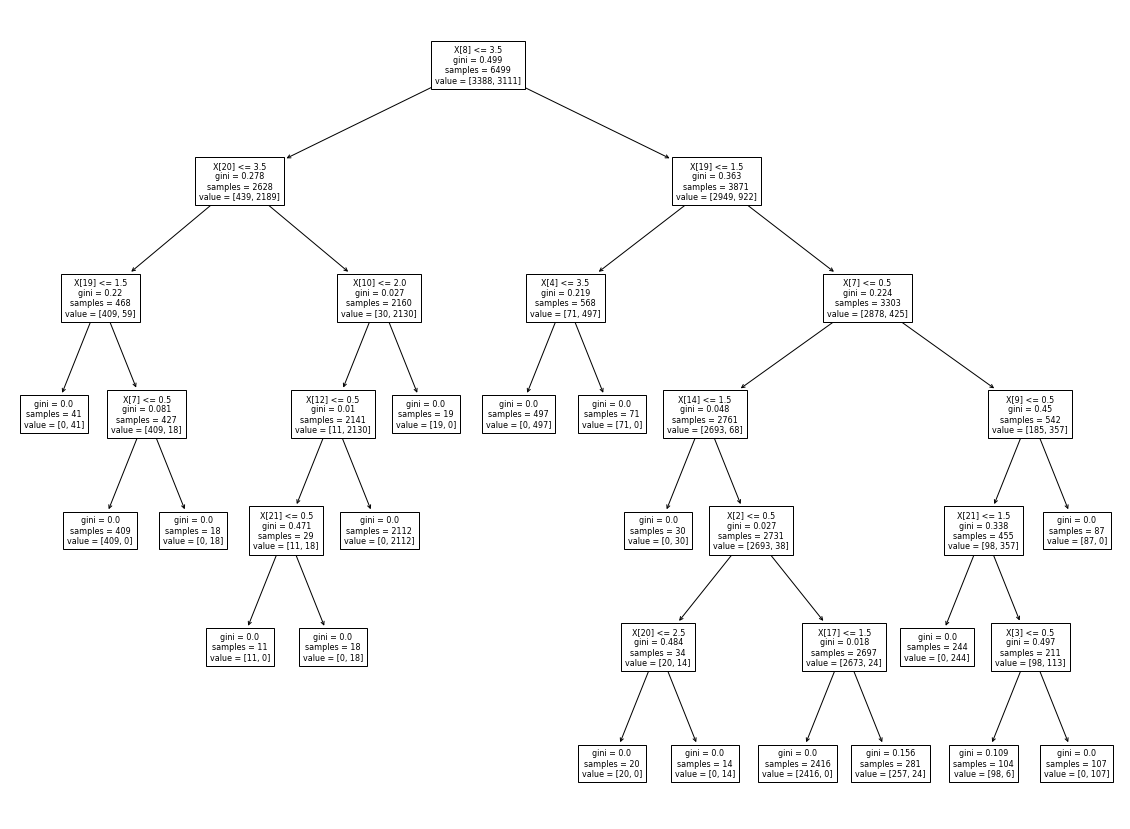

In [8]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
tree.plot_tree(dtm.fit(xm_train, ym_train), fontsize=8)
plt.show()

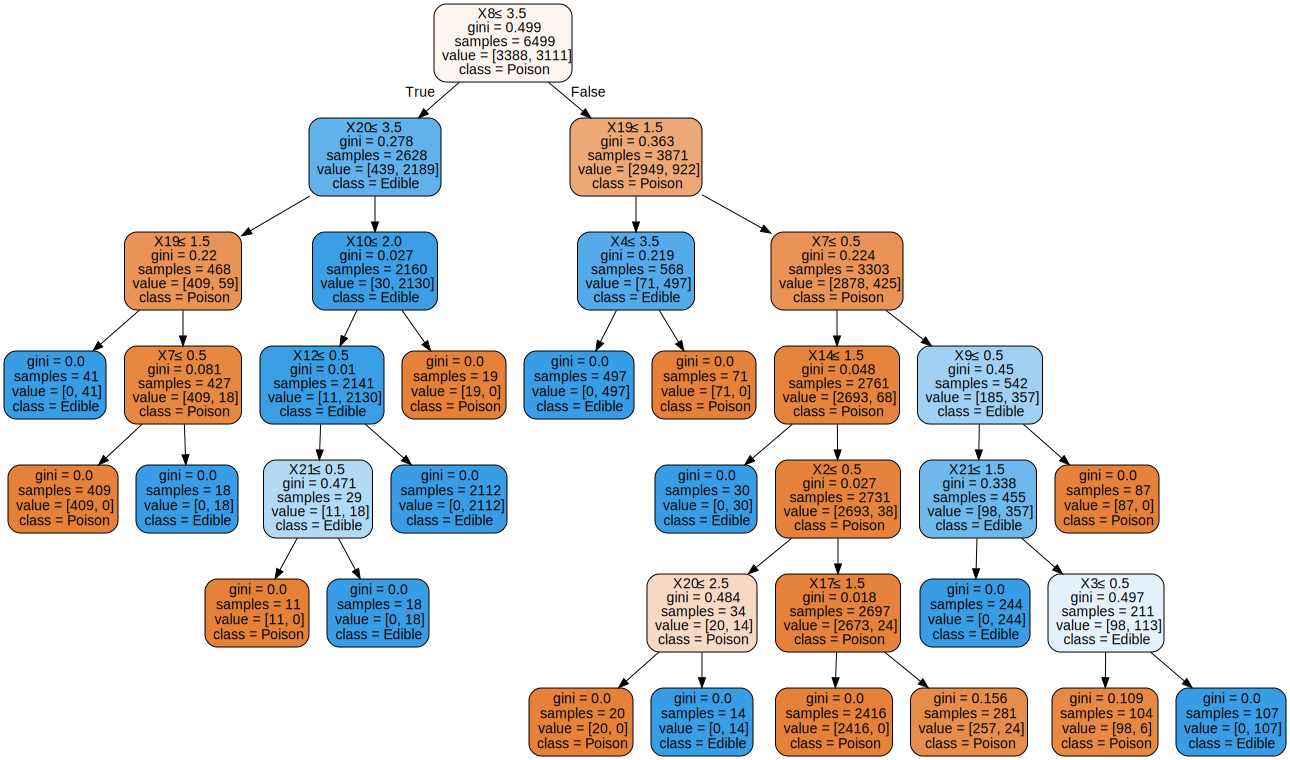

In [9]:
import graphviz
mushroom_data = tree.export_graphviz(
    dtm.fit(xm_train, ym_train), 
    out_file=None,
    class_names=['Poison', 'Edible'],
    filled=True, rounded=True, 
    special_characters=True)
graph = graphviz.Source(mushroom_data)
graph

In [10]:
dtm.fit(xm_train, ym_train)
# Memprediksi label set test
ym_pred_dtm = dtm.predict(xm_test)
#  menghitung set accuracy
acc_dtm = accuracy_score(ym_test, ym_pred_dtm)
print("Test set accuracy: {:.2f}".format(acc_dtm))
print(f"Test set accuracy: {acc_dtm}")

Test set accuracy: 0.99
Test set accuracy: 0.9938461538461538


In [17]:
score_train_dt = dtm.score(xm_train, ym_train)
pred_test_dt = dtm.score(xm_test, ym_test)
print(score_train_dt)
print(pred_test_dt)

0.9953839052161871
0.9938461538461538


### RandomForest

In [11]:
# Pada kasus kali ini kita akan menggunakan estimator pada RandomForest
# Untuk detail parameter (hyperparameter) silahkan cek dokumentasi

rfm = RandomForestClassifier(n_estimators=10, random_state=1)

# Sesuaikan dt ke set training
rfm.fit(xm_train, ym_train)

# Memprediksi label set test
ym_pred_rfm = rfm.predict(xm_test)

#  menghitung set accuracy
acc_rfm = accuracy_score(ym_test, ym_pred_rfm)
print("Test set accuracy: {:.2f}".format(acc_rfm))
print(f"Test set accuracy: {acc_rfm}")

Test set accuracy: 1.00
Test set accuracy: 1.0


<ipython-input-11-4475299c2984>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfm.fit(xm_train, ym_train)


In [18]:
score_train_rf = rfm.score(xm_train, ym_train)
pred_test_rf = rfm.score(xm_test, ym_test)
print(score_train_rf)
print(pred_test_rf)

1.0
1.0


In [25]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points
random_grid = {'n_estimators': n_estimators,'max_features': max_features,'max_depth': max_depth,'min_samples_split': min_samples_split,'min_samples_leaf': min_samples_leaf,'bootstrap': bootstrap}

In [26]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [27]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [28]:
rf_random.fit(xm_train, ym_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\Layla\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [29]:
print ('Random grid: ', random_grid, '\n')
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 20, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': False}  



## __Tugas 2 : Boosting__

Pada folder data, terdapat dataset jamur yang kita gunakan pada materi Decision Tree. Berdasarkan dataset yang sama, bandingkan peforma antara algoritma DT dan AdaBoost. Gunakan tunning hyperparameter untuk mendapatkan parameter dan akurasi yang terbaik.

### Adaboost

In [20]:
from sklearn.ensemble import AdaBoostClassifier
# Pada kasus kali ini kita akan menggunakan estimator pada AdaBoost
# Untuk detail parameter (hyperparameter) silahkan cek dokumentasi

adam = AdaBoostClassifier(n_estimators=2)

# Sesuaikan dt ke set training
adam.fit(xm_train, ym_train)

# Memprediksi label set test
y_pred_ada = adam.predict(xm_test)

#  menghitung set accuracy
acc_ada = accuracy_score(ym_test, y_pred_ada)
print("Test set accuracy: {:.2f}".format(acc_ada))
print(f"Test set accuracy: {acc_ada}")

Test set accuracy: 0.84
Test set accuracy: 0.8449230769230769


c:\Users\Layla\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [21]:
score_train_ada = adam.score(xm_train, ym_train)
pred_test_ada = adam.score(xm_test, ym_test)
print(score_train_ada)
print(pred_test_ada)

0.8430527773503615
0.8449230769230769


In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
# defining the classifier
model = AdaBoostClassifier()
# creating a dic for the grid
grid = dict()
# estimator till 500
grid['n_estimators'] = [10, 50]
# defining learning rate
grid['learning_rate'] = [0.0001, 0.01, 0.1, 1.0, 1.1, 1.2]
# initializing the grid search
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, scoring='accuracy')
# training the model on grid search for hyperparameter tuning of Adaboost
grid_result = grid_search.fit(xm_train, ym_train)
# finding the best results /hyperparameter tuning of Adaboost
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 1.000000 using {'learning_rate': 1.0, 'n_estimators': 50}


c:\Users\Layla\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


## __Tugas 3 : Stacking__

Dengan menggunakan data yang sama, buatlan ensemble voting dengan algoritma
1. Logistic Regression
2. SVM kernel polynomial
3. Decission Tree

Anda boleh melakukan eksplorasi dengan melakukan tunning hyperparameter

In [ ]:
from sklearn.svm import SVC # import SVM classifier
from sklearn.ensemble import VotingClassifier # import model Voting

In [ ]:
# Load Data

dbt = pd.read_csv('data/diabetes.csv')

dbt.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Cek kolom null
dbt.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for column in feature_columns:
    print("============================================")
    print(f"{column} ==> Missing zeros : {len(dbt.loc[dbt[column] == 0])}")

Pregnancies ==> Missing zeros : 111
Glucose ==> Missing zeros : 5
BloodPressure ==> Missing zeros : 35
SkinThickness ==> Missing zeros : 227
Insulin ==> Missing zeros : 374
BMI ==> Missing zeros : 11
DiabetesPedigreeFunction ==> Missing zeros : 0
Age ==> Missing zeros : 0


In [ ]:
from sklearn.impute import SimpleImputer

fill_values = SimpleImputer(missing_values=0, strategy="mean", copy=False)

dbt[feature_columns] = fill_values.fit_transform(dbt[feature_columns])

In [ ]:
x = dbt[feature_columns]
y = dbt.Outcome

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

In [ ]:
logisticRegr.fit(x_train, y_train)

c:\Users\Layla\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Prediksi dengan data test
y_pred_lr = logisticRegr.predict(x_test)

# Evaluasi akurasi testing data
acc_lr = accuracy_score(y_test, y_pred_lr)

# Print hasil evaluasi
print("Test set accuracy: {:.2f}".format(acc_lr))
print(f"Test set accuracy: {acc_lr}")

Test set accuracy: 0.74
Test set accuracy: 0.7359307359307359


### SVM Poly

In [ ]:
# Model SVM linier tanpa tunnning hyperparameter
svm_pl = SVC(kernel='poly')

# Fit ke model
svm_pl.fit(x_train, y_train)

# Prediksi
y_pred_svm_pl = svm_pl.predict(x_test)

# Evaluasi akurasi testing data
acc_svm_pl = accuracy_score(y_test, y_pred_svm_pl)

# Print hasil evaluasi
print("Test set accuracy: {:.2f}".format(acc_svm_pl))
print(f"Test set accuracy: {acc_svm_pl}")

Test set accuracy: 0.74
Test set accuracy: 0.7402597402597403


### Decision Tree

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
# Memprediksi label set test
y_pred_dt = dt.predict(x_test)
#  menghitung set accuracy
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Test set accuracy: {:.2f}".format(acc_dt))
print(f"Test set accuracy: {acc_dt}")

Test set accuracy: 0.71
Test set accuracy: 0.7056277056277056


### Voting

In [ ]:
# Definisikan algoritma yang akan digunakan untuk voting

model1 = LogisticRegression()
model2 = SVC(kernel='poly')
model3 = DecisionTreeClassifier()

# model hard voting
voting = VotingClassifier(estimators=[('LogisticRegression', model1), ('SVM-POLY', model2), ('DT', model3)], voting='hard')

# Fit model
voting.fit(x_train, y_train)

# Prediksi
y_pred_vt1 = voting.predict(x_test)

# Evaluasi akurasi testing data
acc_vt1 = accuracy_score(y_test, y_pred_vt1)

# Print hasil evaluasi
print('Voting Hard')
print("Test set accuracy: {:.2f}".format(acc_vt1))
print(f"Test set accuracy: {acc_vt1}")

Voting Hard
Test set accuracy: 0.74
Test set accuracy: 0.7359307359307359


c:\Users\Layla\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
